# Homework 4

## FINM 37400 - 2023

### UChicago Financial Mathematics


In [6]:
import pandas as pd
import numpy as np
import datetime
import warnings

from sklearn.linear_model import LinearRegression
from scipy.optimize import minimize
from scipy.optimize import fsolve

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 15
plt.rcParams['legend.fontsize'] = 13
pd.set_option("display.precision", 4)

import sys
sys.path.insert(0, '../cmds')
from treasury_cmds import *

# 1 HBS Case: The Information Content of the Yield Curve

## 1.1

The Term Spread
* What is the term spread? 
* What is the preferred measure of the term spread in the case?
* What evidence is cited for the term spread's power in predicting recessions?
* Which is more important, the level of the term spread, its month-over-month change, or the level of short rates?

**Answers:**

* What is the term spread? What is the preferred measure of the term spread in the case?
    - The term spread refers to the diffenrece between long-term and shor-term interest rates. In this cass, it is measured by 10-year Treasury bond and three-month Treasury bill.
 
* What evidence is cited for the term spread's power in predicting recessions?
    - The term spread predicts US real GDP with a lead time of abbout four to six quarters, when the spread is positive, it shows strong economic growth and when the yield curve is inverted, growth should be slow subsequently. 
    - Except for the level of the term spread, a given change is more meaningful the smaller the magnitude of the spread. 

* Which is more important, the level of the term spread, its month-over-month change, or the level of short rates?
    - The level of the term spread is most important, and the month-over-month change also adds influence to the impact, with the level fof short rates individually not influence the prediction in this study. 

Using the file `yields_2022-11-30.xlsx`, calculate the term spread as of the end of November 2022. (Measure it with the 10-year and 1-year yields.)
* What does this term spread suggest about economic growth, according to the evidence of Estrella?

In [3]:
InterestRate = pd.read_excel("../data/yields_2022-11-30.xlsx", index_col=0)
InterestRate.head()

,1,2,5,7,10,20,30
caldt,,,,,,,
1961-06-14,2.9359,3.3607,3.6237,3.7687,3.8188,3.8142,3.8152
1961-06-15,2.9329,3.3765,3.6717,3.8042,3.8630,3.8282,3.8263
1961-06-16,2.9299,3.3757,3.6854,3.8042,3.8633,3.8329,3.8300
1961-06-19,2.9209,3.3900,3.7130,3.8246,3.8862,3.8424,3.8375
1961-06-20,2.9524,3.3558,3.6854,3.8093,3.8865,3.8565,3.8450


In [4]:
term_spread = (InterestRate[10] - InterestRate[1]).to_frame("10-1 Spread")
term_spread

,10-1 Spread
caldt,
1961-06-14,0.8829
1961-06-15,0.9301
1961-06-16,0.9333
1961-06-19,0.9653
1961-06-20,0.9341
...,...
2022-11-23,-1.0005
2022-11-25,-1.0027
2022-11-28,-0.9852


In [15]:
term_spread["ind"] = 0
term_spread.loc[term_spread["10-1 Spread"] < 0, "ind"] = 1
term_spread["ind_diff"] = term_spread["ind"].diff()
recession_date = term_spread[term_spread["ind_diff"] != 0].index[1:]

In [20]:
list(range(0, 10, 2))

[0, 2, 4, 6, 8]

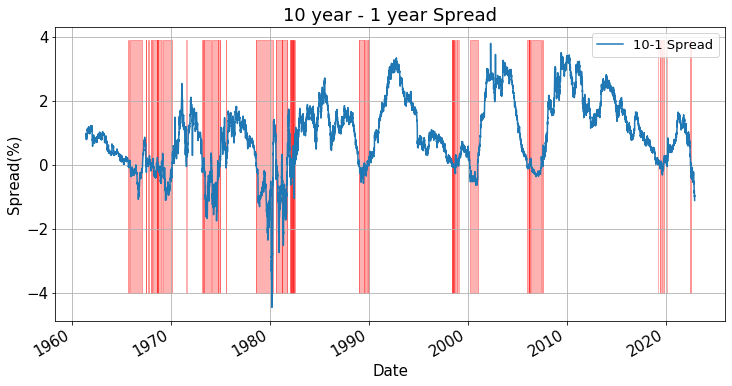

In [23]:
term_spread = (rawdata[10] - rawdata[1]).to_frame("10-1 Spread")
term_spread["ind"] = 0
term_spread.loc[term_spread["10-1 Spread"] < 0, "ind"] = 1
term_spread["ind_diff"] = term_spread["ind"].diff()
recession_date = term_spread[term_spread["ind_diff"] != 0].index[1:]
term_spread[["10-1 Spread"]].plot()
plt.title("10 year - 1 year Spread")
for i in range(0, len(recession_date)-1, 2):
    plt.fill_betweenx(np.arange(-4, 4, 0.1), np.repeat(recession_date[i], 80), np.repeat(recession_date[i+1], 80), color="red", alpha=0.3)
plt.xlabel("Date")
plt.ylabel("Spread(%)")
plt.grid(True)

We can see from the plot that during 1966-1970, 1977-1983, 1988-1990, 2000-2002, 2007-2009 and 2019, term spread forcast that 4-6 months later would appear recession. 


## 1.2

Term premia
* What is the term premium? Why is it impossible to get a direct measure of it?

    - Term premium is the compensation that investors demand for holding a long-term bond instead of a sequence of short-term bonds of comparable risk. It is the extra yield earned for lending money for a longer period.
    - It is also a component of the term spread. If the term premium tightented, the yield curve would flatten. Also, the compression of term premmium would make a more stimulative monetary policy, which precedes an upward growth. 
* Explain equations (1) and (2). Why does Sacks think this concept of the term spread complicates the relationship found by Estrella?
    - Equation (1) shows that long term (10-year) rate is the combination of expected short term rate plus a term premium. 
    - Equation (2) shows that the term spread if an average of expected changes in the short rate plus the term premium. 
    - Because the arise of the first term in the equation shows an uptrend of economic growth, while the rise in the second term shows a growth slowdown. So it is important to figure out how much each part is influenced and the relationship between economics and those two terms. 

## 1.3

Though this case touches on monetary policy, that is not our focus. Rather, our focus is the degree to which the current shape of the yield curve is predictive of future short-term interest rates.

Suppose the term premium is zero. 
* What does an upward sloping yield curve predict about future short-term rates? 
    - Future short-term rates would rise. 
* In this case, is it risky to hold long-term bonds? Is this risk compensated?
    - No. As we assume zero term premium, there is no compesation for holding longer-term bonds compared to holding sequencial short-term bond. 
    
Suppose the term premium increases 3 percentage points.
* What would change about your previous answer?
    - Yes. It is risky to hold longer term bonds and has a term premium of 3 percents. 

# 2 Calculating Forwards

Use the treasury issues in `'../data/selected_treasury_rates.xlsx.xlsx`. 

The selected treasuries are at nearly six-month intervals. Approximate that they mature at perfect 6-month intervals. (We are looking at them from the perspective of March 31, 2022.)

## 2.1 
Bootstrap the discount factor. Plot the answer in terms of discount factors and discount rates.

In [61]:
data = pd.read_excel("../data/selected_treasury_rates.xlsx")
data["maturity"] = np.arange(0.5, 7.5, 0.5)
data

,KYTREASNO,issue date,maturity date,maturity,coupon rate,price,ytm
0,206896,2015-09-30,2022-09-30,0.5,1.750,100.3633,0.0101
1,207688,2021-03-31,2023-03-31,1.0,0.125,98.4570,0.0168
2,207775,2021-09-30,2023-09-30,1.5,0.250,97.2188,0.0213
3,207077,2017-03-31,2024-03-31,2.0,2.125,99.5703,0.0233
4,207416,2019-09-30,2024-09-30,2.5,1.500,97.6211,0.0247
5,207507,2020-03-31,2025-03-31,3.0,0.500,94.1758,0.0251
6,207256,2018-09-30,2025-09-30,3.5,3.000,101.5547,0.0251
7,207337,2019-03-31,2026-03-31,4.0,2.250,98.9297,0.0252
8,207777,2021-09-30,2026-09-30,4.5,0.875,93.0430,0.0250
9,207508,2020-03-31,2027-03-31,5.0,0.625,91.3789,0.0245


In [98]:
data.rename(columns={'maturity date':'TMATDT', 'coupon rate':'TCOUPRT'}, inplace=True)
data['CALDT'] = pd.Timestamp('2022-03-31')

In [118]:
def calc_cashflows(quote_data, filter_maturity_dates=False,  c_dates=None):
    
    CF = pd.DataFrame(data=0, index=quote_data.index, columns=quote_data['TMATDT'].unique())

    for i in quote_data.index:
        if c_dates is not None:
            coupon_dates = c_dates[:i+1]
        else:
            coupon_dates = get_coupon_dates(quote_data.loc[i,'CALDT'],quote_data.loc[i,'TMATDT'])

        if coupon_dates is not None:
            CF.loc[i,coupon_dates] = quote_data.loc[i,'TCOUPRT']/2

        CF.loc[i,quote_data.loc[i,'TMATDT']] += 100
        
    return CF

c_dates = pd.to_datetime(data["TMATDT"])
CF = calc_cashflows(data, filter_maturity_dates=False, c_dates=c_dates)

In [119]:
CF

,2022-09-30,2023-03-30,2023-09-30,2024-03-30,2024-09-30,2025-03-30,2025-09-30,2026-03-30,2026-09-30,2027-03-30,2027-09-30,2028-03-30,2028-09-30,2029-03-30
0,100.8750,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.0625,100.0625,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.1250,0.1250,100.1250,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
3,1.0625,1.0625,1.0625,101.0625,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.7500,0.7500,0.7500,0.7500,100.7500,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
5,0.2500,0.2500,0.2500,0.2500,0.2500,100.2500,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
6,1.5000,1.5000,1.5000,1.5000,1.5000,1.5000,101.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
7,1.1250,1.1250,1.1250,1.1250,1.1250,1.1250,1.1250,101.1250,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
8,0.4375,0.4375,0.4375,0.4375,0.4375,0.4375,0.4375,0.4375,100.4375,0.0000,0.0000,0.0000,0.0000,0.0000
9,0.3125,0.3125,0.3125,0.3125,0.3125,0.3125,0.3125,0.3125,0.3125,100.3125,0.0000,0.0000,0.0000,0.0000


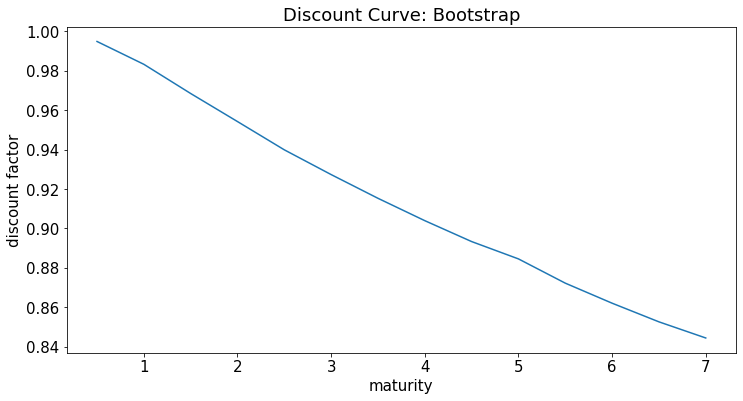

In [121]:
def estimate_curve_ols(CF, prices, interpolate=False):

    if isinstance(prices,pd.DataFrame) or isinstance(prices,pd.Series):
        prices = prices[CF.index].values
    
    mod = LinearRegression(fit_intercept=False).fit(CF.values, prices)

    if interpolate:
        matgrid = get_maturity_delta(CF.columns,CF.columns.min())

        dts_valid = np.logical_and(mod.coef_<1.25, mod.coef_>0)

        xold = matgrid[dts_valid]
        xnew = matgrid
        yold = mod.coef_[dts_valid]

        f = interpolate.interp1d(xold, yold, bounds_error=False, fill_value='extrapolate')    
        discounts = f(xnew)

    else:
        discounts = mod.coef_    
        
    return discounts

prices = data['price']
discount = pd.DataFrame()
discount["maturity"] = data["maturity"]
discount["discount"] = estimate_curve_ols(CF, prices)
plt.plot(data["maturity"], estimate_curve_ols(CF, prices))
plt.xlabel('maturity')
plt.ylabel('discount factor')
plt.title('Discount Curve: Bootstrap')
plt.show()

## 2.2
Calculate the entire forward curve for rates from $T$ to $T+0.5$, ranging $T$ from 0.5 through 6.5.

Plot the forward discount curve.

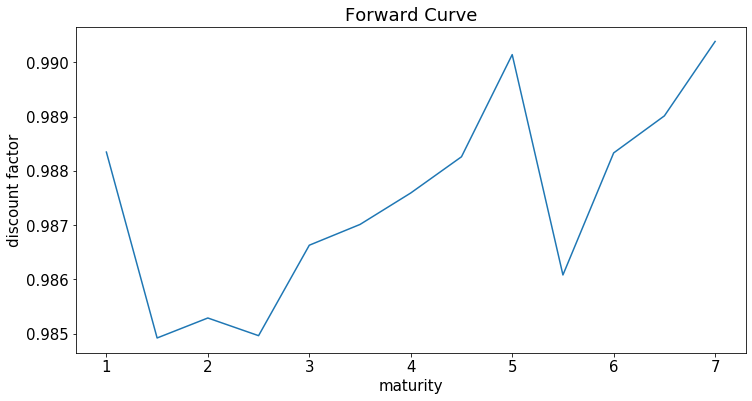

In [137]:
plt.plot(discount["maturity"], discount["forwards"])
plt.xlabel('maturity')
plt.ylabel('discount factor')
plt.title('Forward Curve')
plt.show()

In [125]:
discount["discount"]/discount["discount"].shift()

0        NaN
1     0.9883
2     0.9849
3     0.9853
4     0.9850
5     0.9866
6     0.9870
7     0.9876
8     0.9883
9     0.9901
10    0.9861
11    0.9883
12    0.9890
13    0.9904
Name: discount, dtype: float64

In [126]:
discount["discount"]

0     0.9949
1     0.9833
2     0.9685
3     0.9543
4     0.9399
5     0.9273
6     0.9153
7     0.9039
8     0.8933
9     0.8845
10    0.8722
11    0.8620
12    0.8526
13    0.8444
Name: discount, dtype: float64

## 2.3
Use the discount factors to calculate the forward rate from $T_1=2$ to $T_2=2.5$.

Do the same for $T_1=5$ to $T_2=5.5$.

In [134]:
discount["forwards"] = discount["discount"]/discount["discount"].shift()
discount["forwards rates"] = -np.log(discount["forwards"])/0.5
discount[["maturity", "forwards rates"]]

,maturity,forwards rates
0,0.5,NaN
1,1.0,0.0234
2,1.5,0.0304
3,2.0,0.0296
4,2.5,0.0303
5,3.0,0.0269
6,3.5,0.0261
7,4.0,0.0250
8,4.5,0.0236
9,5.0,0.0198


## 2.4
Explain how an FRA between $T_1$ and $T_2$ would function. How is the rate calculated above involved?